In [1]:
# ----------에타 음식 클러스터링
# ------------------2024-08-19
# -----------------made by 서연

In [2]:
import re
from tqdm import tqdm

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../공모전/everytime_food_df.csv")

In [5]:
df

,content
0,시간만 지키면 된다는 거지?? 요일은 안쓰여 있어서…
1,"한번도 나온적 없는데 2주정도 본가 갔다왂더니방 한쪽에 개미가 4,5마리 정도 살아..."
2,일반 재활용 음식물다 월~목 사이에만 버리면 되는거 맞나요??
3,음식물 처리하는 기계 있어?
4,팔팔 끓는 물에 이거 1~2숟갈 넣으면됨 단점: 양이 너무 많아서 본인이 음식점하는...
...,...
420,자취송이들 일주일에 음식몇번이나 해먹어??
421,일반쓰레기봉투랑 음식물쓰레기봉투 다이소에 작은거 팔아?? 어제 이마트 갔는데안판다해...
422,송이들은 음식물쓰레기 어떻게처리해??제일작은봉투사도 한번에 얼마안담기는데 오래두면 ...
423,자취송이들 음식물 쓰레기 소소한 팁....다이소에서 뚜껑있는 미니 쓰레기통 산 담에...


In [6]:
df_cleaned = df.dropna()
print(df_cleaned)

                                               content
0                        시간만 지키면 된다는 거지?? 요일은 안쓰여 있어서…
1    한번도 나온적 없는데 2주정도 본가 갔다왂더니방 한쪽에 개미가 4,5마리 정도 살아...
2                   일반 재활용 음식물다 월~목 사이에만 버리면 되는거 맞나요??
3                                      음식물 처리하는 기계 있어?
4    팔팔 끓는 물에 이거 1~2숟갈 넣으면됨 단점: 양이 너무 많아서 본인이 음식점하는...
..                                                 ...
420                            자취송이들 일주일에 음식몇번이나 해먹어??
421  일반쓰레기봉투랑 음식물쓰레기봉투 다이소에 작은거 팔아?? 어제 이마트 갔는데안판다해...
422  송이들은 음식물쓰레기 어떻게처리해??제일작은봉투사도 한번에 얼마안담기는데 오래두면 ...
423  자취송이들 음식물 쓰레기 소소한 팁....다이소에서 뚜껑있는 미니 쓰레기통 산 담에...
424  안녕하세요 송이들~♡여기는 자취 또는 하숙하는 송이들을 위한 방이에요!게시판을 만든...

[425 rows x 1 columns]


In [22]:
df = df[df['내용'] != '내용 없음']

In [155]:
df

,내용,tagged_review,vector,cluster
0,나는 치약이나 연고를 쓰다가 여자친구에게 혼난 경험이 종종 있다. 튜브 끝부분부터 ...,"[치약, 연고, 쓰다, 여자친구, 혼나다, 경험, 종종, 튜브, 끝, 부분, 내용물...","[-0.3597096, 0.022556804, -0.23113048, -0.0830...",4
1,멘톨의 정체 오른 쪽 박하 잎,"[멘톨, 정체, 오른, 쪽, 박하, 잎]","[-0.027472517, -0.0038741499, -0.024890115, 0....",3
2,요즘같이 집안 생필품 재고에 바짝 촉을 세우며 지냈던 날들이 있었던가 싶다. 출국을...,"[요즘, 집안, 생필품, 재고, 바짝, 촉, 세우다, 지내다, 날, 싶다, 출국, ...","[-0.43736553, -0.005373348, -0.31377116, -0.13...",2
4,머리카락만큼은 몇 안 되는 자부심 중 하나였 다. 곱슬기 없는 생머 리는 부드럽고 ...,"[머리카락, 안, 자부심, 중, 곱, 슬기, 없다, 생머, 리, 부드럽다, 찰랑거리...","[-0.41488373, 0.024804432, -0.36172953, -0.111...",2
5,침대에서 눈을 감은 채로 멍하니 누워있 었 다. 잠은 이미 일찍 달아나 버린 지 오...,"[침대, 눈, 감다, 채, 멍하니, 눕다, 잠, 일찍, 달아나다, 버리다, 지다, ...","[-0.44608042, -0.019469017, -0.5245153, -0.101...",2
...,...,...,...,...
392,휴대폰 알람이 울린다. 오늘은 월요일. 보나 마나 아침 6시일 것이다. 나는 이미 ...,"[휴대폰, 알람, 린다, 오늘, 월요일, 보나, 마나, 아침, 잠, 깨다, 알람, ...","[-0.6023356, -0.061716046, -0.58613133, -0.366...",2
393,쓰레기 발생을 최소화하는 제로 웨이스트 매장으로 운영되는 올가홀푸드 방이점 전경 ...,"[쓰레기, 발생, 최소, 화하다, 제로, 웨, 이스트, 매장, 운영, 오다, 홀, ...","[-0.05419944, 0.0010843497, -0.039321046, -0.0...",3
394,작은 사리사리에서 판매하는 과자 모든 종류를 구입해봤다.,"[작다, 판매, 과자, 모든, 종류, 구입, 해봤다]","[-0.04628208, -0.010464383, -0.027763546, -0.0...",3
395,종류가 다양한 채식주의 중에서도 비건은 가장 엄격하다. 크게 고기 유제품 난류를 못...,"[종류, 다양하다, 채식, 주의, 중, 비건, 가장, 엄격하다, 크게, 고기, 유제...","[-0.50525963, 0.08895729, -0.20906642, 0.00242...",1


In [31]:
df = df[df['추출된 단어'] != '[]']

In [76]:
pattern = r'[^a-zA-Z0-9가-힣\s\.\?\!]'

new_review = []
for i in tqdm(df.내용):
    text = re.sub(pattern, '', i)
    new_review.append(text)

df['내용'] = new_review

100%|██████████| 397/397 [00:00<00:00, 16057.11it/s]


In [84]:
# 인덱스 재설정
df.reset_index(drop=True, inplace=True)

In [85]:
df['내용'].head(10)

0    나는 치약이나 연고를 쓰다가 여자친구에게 혼난 경험이 종종 있다. 튜브 끝부분부터 ...
1                                     멘톨의 정체 오른 쪽 박하 잎
2    요즘같이 집안 생필품 재고에 바짝 촉을 세우며 지냈던 날들이 있었던가 싶다. 출국을...
3                                          산위에서 내려본 운무
4    머리카락만큼은 몇 안 되는 자부심 중 하나였 다. 곱슬기 없는 생머 리는 부드럽고 ...
5    침대에서 눈을 감은 채로 멍하니 누워있 었 다. 잠은 이미 일찍 달아나 버린 지 오...
6    나는 왜 글을 잘 쓰지 못하는가 생각을 해보았다. 글을 쓰려면 생각하는 시간이 필요...
7    23년 9월 20일. 제로지출했다. 아무것도 사지 않은 날! 어땠냐면.. 속 시끄럽...
8                               자각몽에서 보인다는 디스맨This man
9    큰 일을 볼 때면 항상 손에 폰을 쥐고 있었다. 화장실에서 글을 쓰면 왠지 더 잘 ...
Name: 내용, dtype: object

In [7]:
for i, review in enumerate(tqdm(df.content)):
    if len(review) < 15: # 15자 미만의 의미 없는 짧은 글 제거
        df = df.drop([i])

100%|██████████| 425/425 [00:00<00:00, 106238.70it/s]


In [8]:
from konlpy.tag import Okt
okt=Okt()

In [10]:
stopwords = ['있다', '되다', '하다', '나', '는', '은', '이', '가', '을', '를', '에', '에서', 
             '에게', '한테', '과', '와', '아', '랑', '으로', '로', '께서', '이나', '이라', '이야', 
             '인가', '이야말로', '그리고', '그런데', '그래서', '그래도', '그러나', '그럼에도', '그러면', 
             '그러니까', '그러므로', '그러니까', '그렇게', '그렇지만', '그렇다면', '아니면', '아니라', 
             '그런', '이런', '그렇지', '그래', '저런', '이러한', '그러한', '저러한', '어떤', '이따', 
             '이래', '이렇게', '저렇게', '그따', '그래서', '아무', '전부', '가지', '갖고', '몇', 
             '무슨', '어느', '몇몇', '어떤', '어떻게', '어떤', '아무', '나', '우리', '당신', '자기', 
             '그녀', '저희', '하다', '되다', '않다', '없다', '있다', '되어다', '하고', '그러면', 
             '그래서', '이렇게', '저렇게', '요즘', '그것', '이것', '저것', '있다고', '그렇지만', '그래도'
            '코웨이', '안녕하세요', '웅진코웨이', '\u200b', '이다', '안녕하다', '아니다', '같다', '거', '것', '음식', '음식물', '송이',
            '오늘', '혹시', '먹다', '송']

In [11]:
tagg  = ['Noun', 'Adjective', 'Verb']

def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem = True, norm = True)
    words = [word for word, tag in pos_words if tag in tagg if word not in stopwords]
    return words

In [12]:
tagged_list = []
for text in tqdm(df.content):
    tagged_list.append(okt_pos_tagging(text))

100%|██████████| 418/418 [00:03<00:00, 128.31it/s]


In [15]:
# 경고 무시
pd.set_option('mode.chained_assignment', None)

In [16]:
df['tagged_review'] = tagged_list

In [18]:
df

,content,tagged_review
0,시간만 지키면 된다는 거지?? 요일은 안쓰여 있어서…,"[시간, 지키다, 거지, 요일, 쓰이다]"
1,"한번도 나온적 없는데 2주정도 본가 갔다왂더니방 한쪽에 개미가 4,5마리 정도 살아...","[한번, 나오다, 적, 주정, 본가, 가다, 왂, 더니, 방, 한쪽, 개미, 마리,..."
2,일반 재활용 음식물다 월~목 사이에만 버리면 되는거 맞나요??,"[일반, 재활용, 월, 목, 사이, 버리다, 맞다]"
3,음식물 처리하는 기계 있어?,"[처리, 기계]"
4,팔팔 끓는 물에 이거 1~2숟갈 넣으면됨 단점: 양이 너무 많아서 본인이 음식점하는...,"[팔팔, 끓다, 물, 숟갈, 넣다, 단점, 양, 많다, 본인, 음식점, 유통, 내]"
...,...,...
420,자취송이들 일주일에 음식몇번이나 해먹어??,"[자취, 일주일, 몇번, 해먹]"
421,일반쓰레기봉투랑 음식물쓰레기봉투 다이소에 작은거 팔아?? 어제 이마트 갔는데안판다해...,"[쓰레기봉투, 쓰레기봉투, 다이소, 작다, 팔, 어제, 이마트, 가다, 판다]"
422,송이들은 음식물쓰레기 어떻게처리해??제일작은봉투사도 한번에 얼마안담기는데 오래두면 ...,"[쓰레기, 어떻다, 처리, 해, 은봉, 투사, 한번, 얼, 마안, 담기다, 두다, ..."
423,자취송이들 음식물 쓰레기 소소한 팁....다이소에서 뚜껑있는 미니 쓰레기통 산 담에...,"[자취, 쓰레기, 소소하다, 팁, 다이소, 뚜껑, 미니, 쓰레기통, 산, 담, 거기..."


In [19]:
import gensim #자연어 처리 및 토픽 모델링을 위한 라이브러리
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec

In [20]:
# doc2vector
tagged_corpus_list = []
for i, token in enumerate(df['tagged_review']):
    tag = f"document {i}"
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words=token))

In [21]:
tagged_corpus_list[0]

TaggedDocument(words=['시간', '지키다', '거지', '요일', '쓰이다'], tags=['document 0'])

In [22]:
model = doc2vec.Doc2Vec(vector_size=100, alpha=0.025, min_alpha=0.025, window=5)

In [23]:
model.build_vocab(tagged_corpus_list)

model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=5)

In [24]:
vector_list = []

for i in range(len(df)):
    doc2vec = model.dv[f'document {i}']
    vector_list.append(doc2vec)

In [25]:
# 경고 무시
pd.set_option('mode.chained_assignment', None)

In [26]:
df['vector'] = vector_list

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [28]:
linked = linkage(list(df['vector']), 'ward')

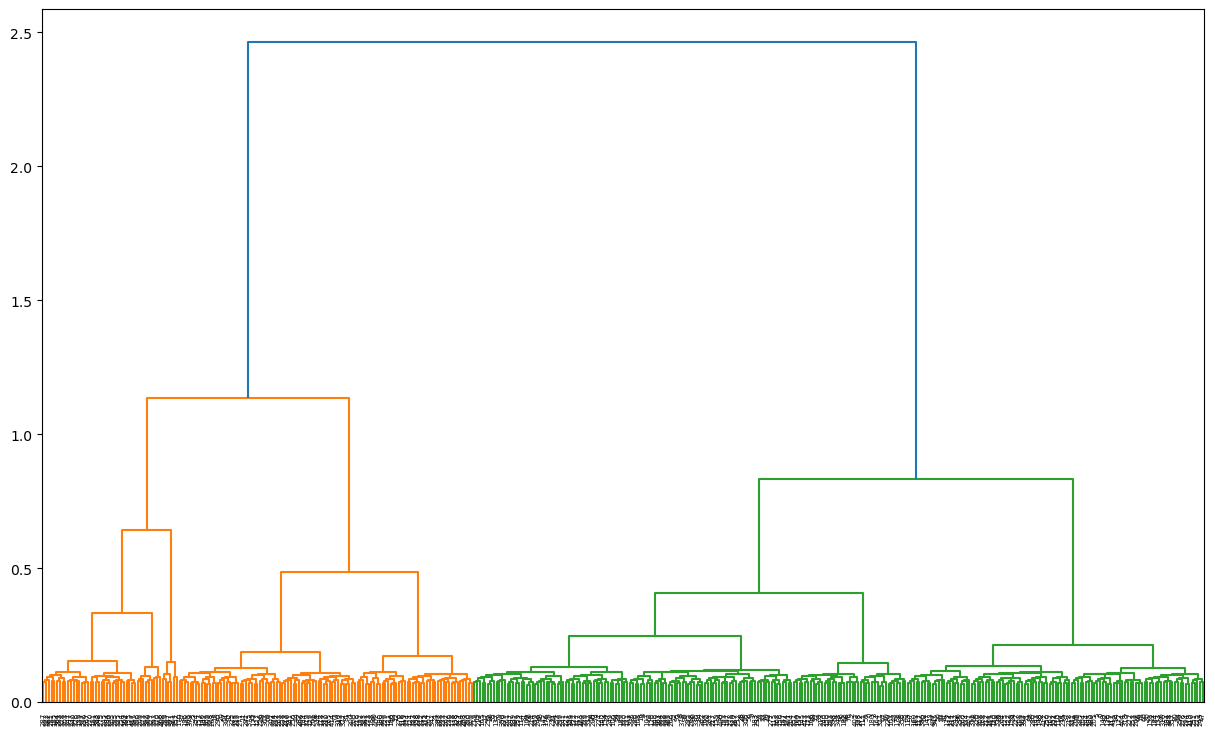

In [29]:
plt.figure(figsize=(15, 9))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.savefig('sample_plot.png')

plt.show()

In [30]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [31]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_label = cluster.fit_predict(list(df['vector']))

# 실루엣 지수 구하기
score = silhouette_score(list(df['vector']), cluster_label)
score

0.411095

In [32]:
n_cluster = []
s_score = []

for i in tqdm(range(2, 30)):
    cluster = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_label = cluster.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), cluster_label)

    n_cluster.append(i)
    s_score.append(score)

100%|██████████| 28/28 [00:00<00:00, 101.94it/s]


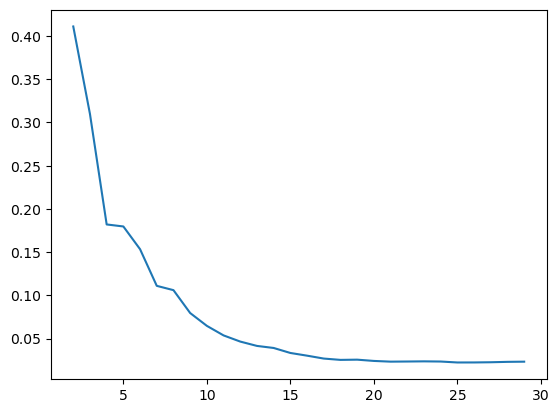

In [33]:
plt.plot(n_cluster, s_score)

In [34]:
result = pd.DataFrame({'n_cluster': n_cluster, 'score': s_score})

In [35]:
result

,n_cluster,score
0,2,0.411095
1,3,0.309788
2,4,0.182022
3,5,0.179689
4,6,0.153372
5,7,0.110983
6,8,0.105994
7,9,0.079523
8,10,0.064683
9,11,0.053636


In [36]:
cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')
cluster_label = cluster.fit_predict(list(df['vector']))

df['cluster'] = cluster_label 

In [39]:
df['cluster'].value_counts()

cluster
0    156
1    107
3     64
2     43
5     42
4      6
Name: count, dtype: int64

In [40]:
# 피클 파일로 저장
import pickle

with open('에타 클러스터링 결과.pkl', 'wb') as file:
    pickle.dump(df, file)

-----

In [41]:
import pandas as pd
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [43]:
with open('에타 클러스터링 결과.pkl', 'rb') as file:
    df_cluster = pickle.load(file)

In [44]:
df_cluster

,content,tagged_review,vector,cluster
0,시간만 지키면 된다는 거지?? 요일은 안쓰여 있어서…,"[시간, 지키다, 거지, 요일, 쓰이다]","[-0.005331531, -0.0054834024, -0.009916664, 0....",0
1,"한번도 나온적 없는데 2주정도 본가 갔다왂더니방 한쪽에 개미가 4,5마리 정도 살아...","[한번, 나오다, 적, 주정, 본가, 가다, 왂, 더니, 방, 한쪽, 개미, 마리,...","[-0.0063293697, 0.0032756056, -0.006242724, 0....",3
2,일반 재활용 음식물다 월~목 사이에만 버리면 되는거 맞나요??,"[일반, 재활용, 월, 목, 사이, 버리다, 맞다]","[-0.008274464, -0.0077242153, 0.008530899, -0....",0
3,음식물 처리하는 기계 있어?,"[처리, 기계]","[-0.0038715985, 0.007716394, 0.0019728339, 0.0...",0
4,팔팔 끓는 물에 이거 1~2숟갈 넣으면됨 단점: 양이 너무 많아서 본인이 음식점하는...,"[팔팔, 끓다, 물, 숟갈, 넣다, 단점, 양, 많다, 본인, 음식점, 유통, 내]","[-0.007361897, -0.0046415743, -0.0046478533, -...",0
...,...,...,...,...
420,자취송이들 일주일에 음식몇번이나 해먹어??,"[자취, 일주일, 몇번, 해먹]","[0.0069544627, -0.006483853, -0.00609031, -0.0...",0
421,일반쓰레기봉투랑 음식물쓰레기봉투 다이소에 작은거 팔아?? 어제 이마트 갔는데안판다해...,"[쓰레기봉투, 쓰레기봉투, 다이소, 작다, 팔, 어제, 이마트, 가다, 판다]","[0.0006823875, -1.7322425e-05, -0.0035745837, ...",3
422,송이들은 음식물쓰레기 어떻게처리해??제일작은봉투사도 한번에 얼마안담기는데 오래두면 ...,"[쓰레기, 어떻다, 처리, 해, 은봉, 투사, 한번, 얼, 마안, 담기다, 두다, ...","[0.0006285338, 0.010039064, -0.008677848, 0.00...",1
423,자취송이들 음식물 쓰레기 소소한 팁....다이소에서 뚜껑있는 미니 쓰레기통 산 담에...,"[자취, 쓰레기, 소소하다, 팁, 다이소, 뚜껑, 미니, 쓰레기통, 산, 담, 거기...","[-0.009748186, 0.004204018, -0.0018053179, -0....",3


In [45]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

In [46]:
df_cluster0 = df[df['cluster'] == 0]
df_cluster0

,content,tagged_review,vector,cluster
0,시간만 지키면 된다는 거지?? 요일은 안쓰여 있어서…,"[시간, 지키다, 거지, 요일, 쓰이다]","[-0.005331531, -0.0054834024, -0.009916664, 0....",0
2,일반 재활용 음식물다 월~목 사이에만 버리면 되는거 맞나요??,"[일반, 재활용, 월, 목, 사이, 버리다, 맞다]","[-0.008274464, -0.0077242153, 0.008530899, -0....",0
3,음식물 처리하는 기계 있어?,"[처리, 기계]","[-0.0038715985, 0.007716394, 0.0019728339, 0.0...",0
4,팔팔 끓는 물에 이거 1~2숟갈 넣으면됨 단점: 양이 너무 많아서 본인이 음식점하는...,"[팔팔, 끓다, 물, 숟갈, 넣다, 단점, 양, 많다, 본인, 음식점, 유통, 내]","[-0.007361897, -0.0046415743, -0.0046478533, -...",0
10,어떻게 없애?원래 전혀 안났는데 얼음에서 이상한 냄새 나서 보니까 냉동실에 있는 음...,"[어떻다, 없애다, 원래, 전혀, 나다, 얼음, 이상하다, 냄새, 나서다, 보, 냉...","[-0.0036119581, -0.0015384956, 0.0038429727, -...",0
...,...,...,...,...
406,하숙 공용냉장고 다른사람 음식 빼먹기도 하나요..?!!,"[하숙, 공용, 냉장고, 다른사람, 빼먹다, 기도, 하나요]","[0.0034603719, -0.0035577032, 0.008204381, -0....",0
407,"자취송이들 밥 잘 챙겨먹는 편이야?? ㅠㅠㅠ맨날 냉동식품이나 샐러드, 아니면 배달음...","[자취, 밥, 자다, 챙기다, 편이, 냉동식품, 샐러드, 배달]","[-0.010207786, 0.0004468941, -0.009836256, 0.0...",0
412,자취송이 배달음식 일주일마다 한번씩 시켜먹는거 너무한가..?ㅠㅠ알바도 안하는데 이래...,"[자취, 배달, 일주일, 한번, 시키다, 너무하다, 알바, 모르다, 타]","[-0.00037706067, -0.0002830553, -0.00010452426...",0
416,나송... 벌레가 너무 무서워서 집에 음식물 안들여놔... 참고로 정말 벌레 없음...🙃,"[나송, 벌레, 무섭다, 집, 들여놓다, 참고, 정말, 벌레]","[-0.005953417, -0.0012371269, -0.00084633625, ...",0


In [47]:
all_document = list(df_cluster0['tagged_review'])
dictionary = Dictionary(all_document)

In [48]:
dictionary.token2id

{'거지': 0,
 '시간': 1,
 '쓰이다': 2,
 '요일': 3,
 '지키다': 4,
 '맞다': 5,
 '목': 6,
 '버리다': 7,
 '사이': 8,
 '월': 9,
 '일반': 10,
 '재활용': 11,
 '기계': 12,
 '처리': 13,
 '끓다': 14,
 '내': 15,
 '넣다': 16,
 '단점': 17,
 '많다': 18,
 '물': 19,
 '본인': 20,
 '숟갈': 21,
 '양': 22,
 '유통': 23,
 '음식점': 24,
 '팔팔': 25,
 '겉': 26,
 '나다': 27,
 '나서다': 28,
 '냄새': 29,
 '냉동': 30,
 '보': 31,
 '비닐': 32,
 '실': 33,
 '어떻다': 34,
 '얼음': 35,
 '없애다': 36,
 '원래': 37,
 '이상하다': 38,
 '전혀': 39,
 '귀찮다': 40,
 '그렇다': 41,
 '놀다': 42,
 '단': 43,
 '뒷정리': 44,
 '때': 45,
 '말': 46,
 '배달': 47,
 '번': 48,
 '사실': 49,
 '시키다': 50,
 '이지': 51,
 '자취': 52,
 '적': 53,
 '친구': 54,
 '혼자': 55,
 '가시다': 56,
 '기': 57,
 '깔다': 58,
 '다가': 59,
 '비': 60,
 '비주': 61,
 '성비': 62,
 '얼': 63,
 '엄청나다': 64,
 '진정하다': 65,
 '파스타': 66,
 '계시다': 67,
 '리터': 68,
 '방': 69,
 '분': 70,
 '쓰레기': 71,
 '장': 72,
 '장정': 73,
 '전체': 74,
 '정도': 75,
 '정리': 76,
 '꽂다': 77,
 '두다': 78,
 '만원': 79,
 '보다': 80,
 '본가': 81,
 '사람': 82,
 '슬프다': 83,
 '어제': 84,
 '오다': 85,
 '저녁': 86,
 '카드': 87,
 '가다': 88,
 '상관없다': 89,
 '제': 90,
 '쪽'

In [49]:
corpus = []
for doc in all_document:
    corpus.append(dictionary.doc2bow(doc))

In [50]:
topic_num = 3

ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=topic_num, id2word=dictionary)

In [51]:
ldamodel.print_topics(num_words=7)

[(0,
  '0.017*"버리다" + 0.016*"쓰레기" + 0.015*"쓰다" + 0.011*"그냥" + 0.010*"집" + 0.010*"자취" + 0.010*"음"'),
 (1,
  '0.035*"배달" + 0.024*"시키다" + 0.018*"쓰레기" + 0.017*"어떻다" + 0.016*"버리다" + 0.012*"자취" + 0.010*"살다"'),
 (2,
  '0.018*"냄새" + 0.016*"배달" + 0.009*"층" + 0.009*"추천" + 0.008*"좋다" + 0.007*"개" + 0.007*"해먹"')]

In [52]:
ldamodel.get_document_topics(corpus)[0]

[(0, 0.056159213), (1, 0.88754934), (2, 0.056291405)]

In [53]:
for i in range(len(corpus)):
    print(ldamodel.get_document_topics(corpus)[i])

[(0, 0.05615916), (1, 0.8875498), (2, 0.056291003)]
[(0, 0.043622717), (1, 0.91371924), (2, 0.042657997)]
[(0, 0.120940305), (1, 0.48525667), (2, 0.39380297)]
[(0, 0.29807398), (1, 0.6743198), (2, 0.027606264)]
[(0, 0.9502213), (1, 0.022308122), (2, 0.027470572)]
[(0, 0.8621489), (1, 0.117051475), (2, 0.020799613)]
[(0, 0.94740534), (1, 0.02613877), (2, 0.026455931)]
[(0, 0.95525736), (1, 0.023684364), (2, 0.021058327)]
[(0, 0.02246864), (1, 0.95541495), (2, 0.022116404)]
[(0, 0.034031525), (1, 0.9338366), (2, 0.03213191)]
[(0, 0.0182359), (1, 0.96658516), (2, 0.015178922)]
[(0, 0.020426957), (1, 0.95920336), (2, 0.020369712)]
[(0, 0.93764096), (1, 0.031656418), (2, 0.030702617)]
[(0, 0.025015159), (1, 0.94107574), (2, 0.03390911)]
[(0, 0.96104693), (1, 0.020465158), (2, 0.018487928)]
[(0, 0.027227707), (1, 0.94619936), (2, 0.026572945)]
[(0, 0.059046887), (1, 0.88166624), (2, 0.059286904)]
[(0, 0.9584761), (1, 0.021018876), (2, 0.02050496)]
[(0, 0.95332086), (1, 0.025648572), (2, 0.02

In [54]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

In [55]:
perplex_score = ldamodel.log_perplexity(corpus)

In [56]:
perplex_score

-6.80125121091959

In [57]:
coherence_model = CoherenceModel(model = ldamodel, texts = all_document, dictionary=dictionary, topn=3)

In [58]:
coherence_model.get_coherence()

0.5342412989668873

In [59]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=i, id2word=dictionary)
    perp_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perp_v)

Text(0, 0.5, 'Perplexity score')

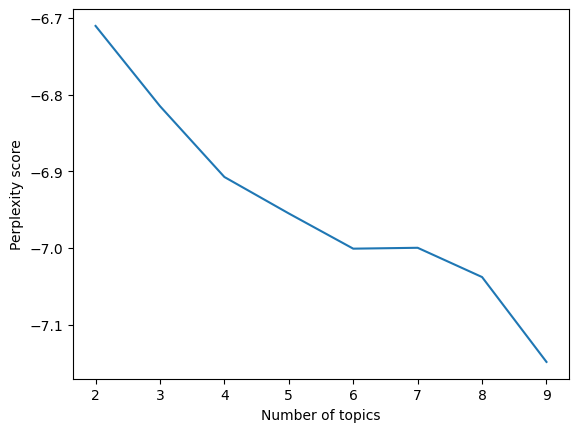

In [60]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [61]:
coherence_values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model = ldamodel, texts = all_document, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

Text(0, 0.5, 'Coherence score')

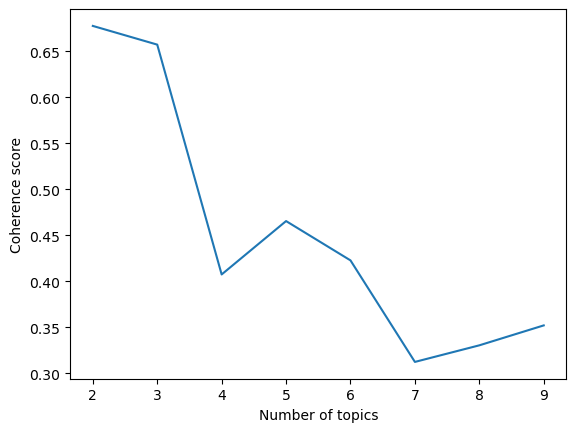

In [62]:
x = range(2,10)

plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [63]:
topic_n = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic_n, id2word=dictionary, random_state=1, passes=5)

In [64]:
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []

    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

100%|██████████| 156/156 [00:00<00:00, 9446.63it/s]


In [65]:
df_cluster0['action_cluster'] = action_align

In [66]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [67]:
predpared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(predpared_data, 'ldavis_actor0.html')
pyLDAvis.display(predpared_data)